In [15]:

import nltk 

import altair as alt

'''Pakages to load dataset'''
import pandas as pd


from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
def NMF_modeling(df_data, components):
    df = df_data.copy()

    # Initialize TF-IDF vectorizer
    model = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.2, max_df=0.8)

    # Fit and transform the TF-IDF matrix
    word_vector = model.fit_transform(df['pdf_content'])

    # Fit NMF model
    nmf_model = NMF(n_components=components, init='nndsvd')
    nmf_model.fit(word_vector)

    # Assign the dominant topic to each document
    df['topic'] = nmf_model.transform(word_vector).argmax(axis=1)

    topic_words_dict = {}
    topic_words = {}

    n_words = 10

    feature_names = model.get_feature_names_out()

    # Extract top words for each topic and calculate TF-IDF scores
    for idx, topic in enumerate(nmf_model.components_):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]

        # Get TF-IDF scores for the top words
        tfidf_scores = [model.idf_[model.vocabulary_[word]] for word in top_words]

        topic_words_dict[idx] = list(zip(top_words, tfidf_scores))
        topic_words[idx] = top_words

    # Add the topic_words_dict and topic_words to the DataFrame
    df['topic_words_tfid'] = [topic_words_dict[i] for i in df['topic']]
    df['topic_words'] = [topic_words[i] for i in df['topic']]

    return df, model


In [30]:
pdf_data = pd.read_csv("Data_mesh_cleaned.csv")
result, tfidf_model = NMF_modeling(pdf_data, components=20)


In [31]:
result

,pdf_name,pdf_content,topic,topic_words_tfid,topic_words
0,0670.pdf,introducing city platform design marcin kryste...,9,"[(city, 2.252762968495368), (scenario, 1.93430...","[city, scenario, digital, rule, stakeholder, p..."
1,1-s2.0-S1877050921022365-main.pdf,author http license system projman system tech...,10,"[(big, 1.2876820724517808), (warehouse, 1.3364...","[big, warehouse, zalando, possible, serve, fig..."
2,1-s2.0-S1877050923006099-main.pdf,author http license program chair procs procs ...,12,"[(monitoring, 1.6931471805599454), (community,...","[monitoring, community, iot, edge, serve infra..."
3,2302.01713.pdf,practice avoid mess jan bode germany niklas kü...,2,"[(organization, 1.336472236621213), (practice,...","[organization, practice, motivational factor, ..."
4,2304.01062.pdf,systematic gray abel goedegebuure indika kumar...,4,"[(gray, 2.252762968495368), (id, 2.13497993283...","[gray, id, policy, self serve, code, serve, sy..."
5,978-1-4842-9253-2.pdf,fabric approach ai guide ai cataloging integra...,18,"[(ai, 1.3877655310087635), (fabric, 1.62415430...","[ai, fabric, ml, asset, metadata, semantic, ca..."
6,978-3-031-12423-5_7.pdf,cok survey privacy challenge relation mesh nik...,17,"[(privacy, 1.5596157879354227), (dimensional, ...","[privacy, dimensional, network, attribute, run..."
7,978-3-031-36118-0.pdf,lecture note engineering communication technol...,19,"[(optimization, 2.386294361119891), (task, 1.4...","[optimization, task, technique, process, perfo..."
8,978-3-031-39847-6_1.pdf,integration revitalized warehouse lake robert ...,19,"[(optimization, 2.386294361119891), (task, 1.4...","[optimization, task, technique, process, perfo..."
9,978-3-031-45021-1_23.pdf,converging microservice principle uni logical ...,16,"[(microservice, 2.0296194171811583), (microser...","[microservice, microservices, object, analytic..."


In [32]:
visual_df = pd.DataFrame(columns=['pdf_name', 'topic_words', 'tfidf_values'])

# Flatten the result DataFrame for visualization
for index, row in result.iterrows():
    for word, tfidf in row['topic_words_tfid']:
        visual_df = visual_df.append({
            'pdf_name': row['pdf_name'],
            'topic_words': word,
            'tfidf_values': tfidf
        }, ignore_index=True)

# Color-coded bar chart with Altair
chart = alt.Chart(visual_df).mark_bar().encode(
    x='pdf_name:N',
    y='tfidf_values:Q',
    color='tfidf_values:Q',
    tooltip=['pdf_name:N', 'topic_words:N', 'tfidf_values:Q']
).properties(
    width=800,
    height=400
)

# Save the chart to an HTML file
chart.save('chart.html')

C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: Future

C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: Future

C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  visual_df = visual_df.append({
C:\Users\sitas\AppData\Local\Temp\ipykernel_1528\4162598191.py:6: Future

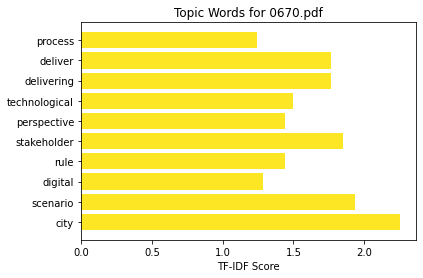

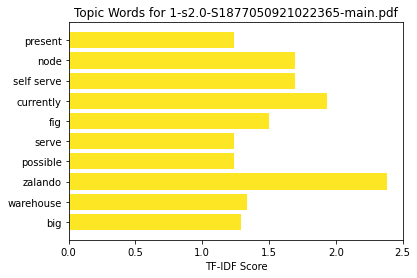

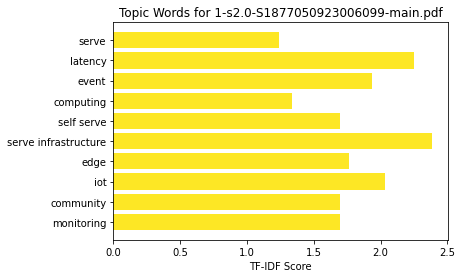

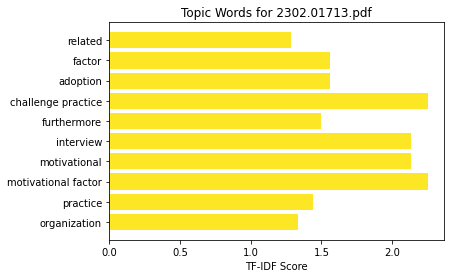

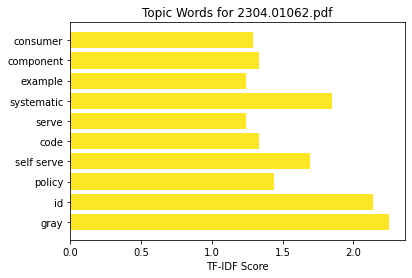

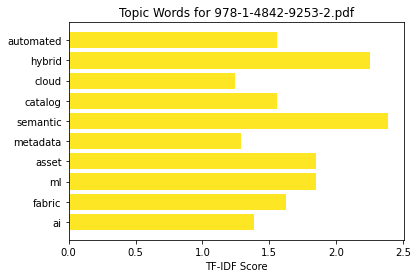

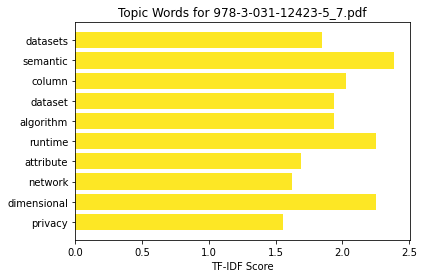

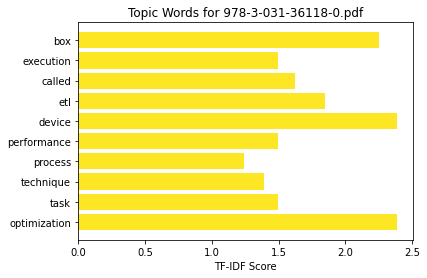

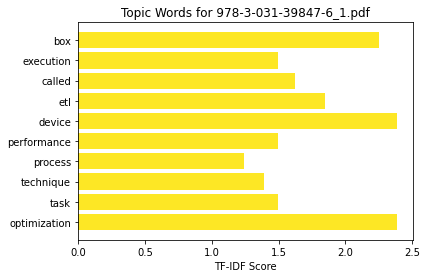

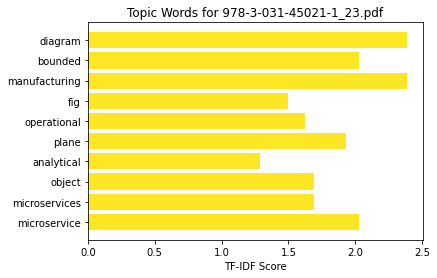

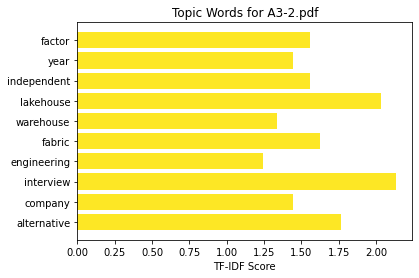

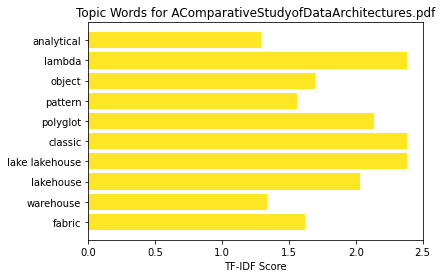

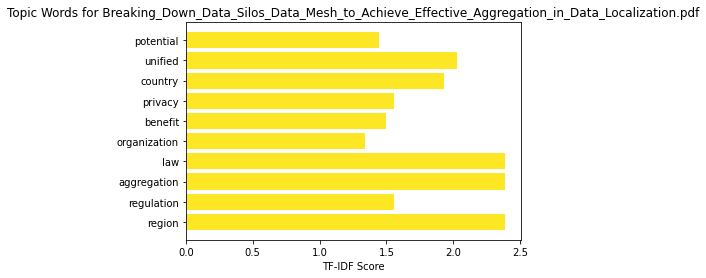

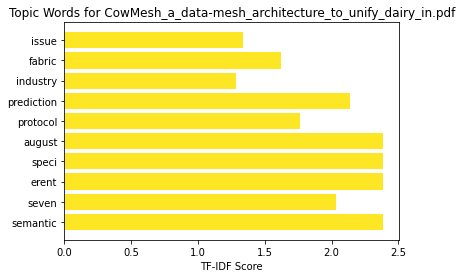

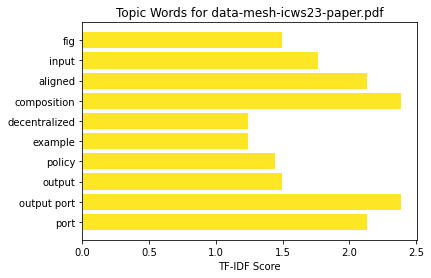

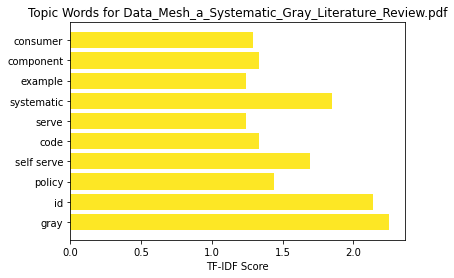

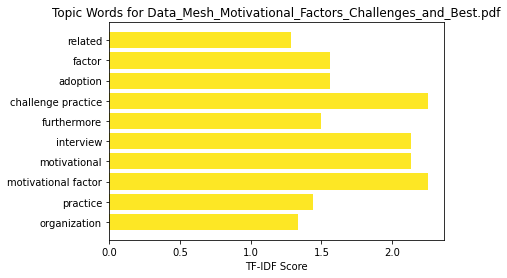

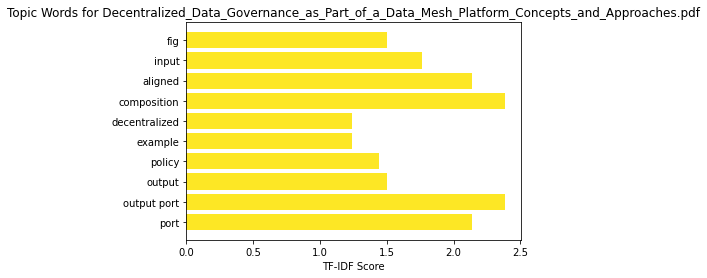

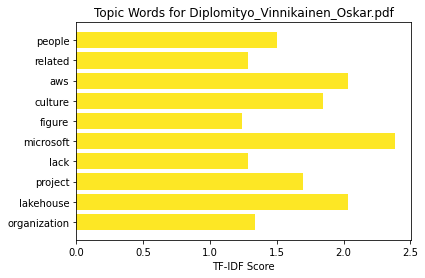

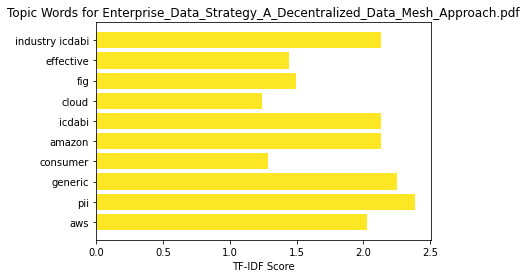

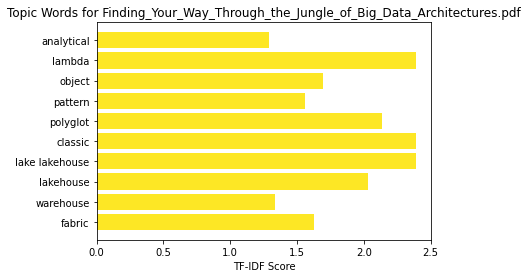

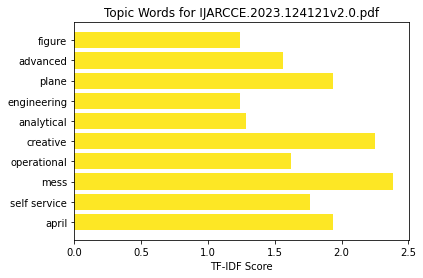

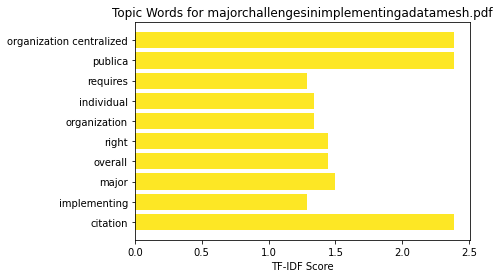

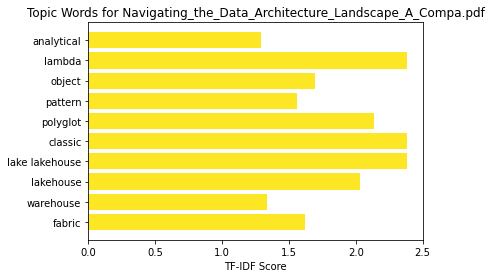

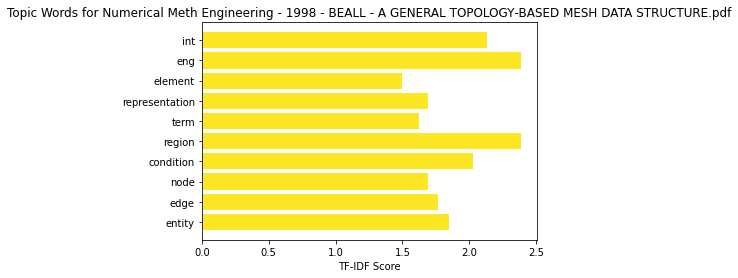

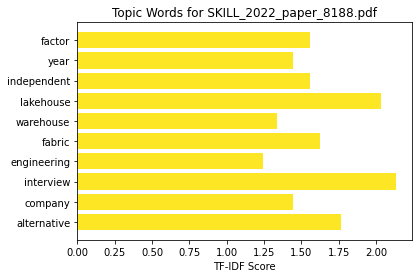

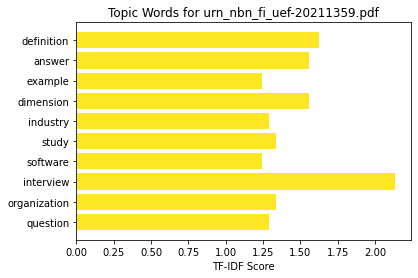

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

def visualize_results(df):
    for index, row in df.iterrows():
        pdf_name = row['pdf_name']
        topic_words = row['topic_words_tfid']

        # Extract words and TF-IDF scores
        words, tfidf_scores = zip(*topic_words)

        # Color code the words based on normalized TF-IDF scores
        colors = plt.cm.viridis(tfidf_scores)

        # Create a horizontal bar chart
        plt.barh(words, tfidf_scores, color=colors)
        plt.xlabel('TF-IDF Score')
        plt.title(f'Topic Words for {pdf_name}')
        plt.show()

# Assuming 'result' is the DataFrame returned from your NMF_modeling function
visualize_results(result)